In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pyro
from models.time_depend01 import model2

In [2]:
def data_generator(length,cp,inc1,inc2):
    data = []
    mean = 0.0
    for i in range(length):
        if i < cp:
            data.append(np.random.normal(mean,0.01))
            mean += inc1
        else:
            data.append(np.random.normal(mean,0.01))
            mean += inc2
    return data

In [3]:
#from plot import plot
data1=data_generator(100,50,0.1,0.2)
#plot(data1)

In [4]:
adam = pyro.optim.Adam({"lr": 0.02}) 
elbo = pyro.infer.Trace_ELBO()
model2 = model2(data1,len(data1),10,10,10,10,10,10,10,10)
svi = pyro.infer.SVI(model2.generator, model2.inference, adam, elbo)

In [5]:
from scipy.special import softmax
losses=[]
probs=[]
for step in range(100):  # Consider running for more steps.
    loss = svi.step(torch.tensor(data1))
    losses.append(loss)
    print(step)
    print("p",pyro.param("p").data.cpu().numpy())
    print("loc1",pyro.param("loc1").data.cpu().numpy())
    print("scale1",pyro.param("scale1").data.cpu().numpy())
    print("loc2",pyro.param("loc2").data.cpu().numpy())
    print("scale2",pyro.param("scale2").data.cpu().numpy())
        

ValueError: Error while computing log_prob at site 'obs':
The value argument to log_prob must be a Tensor
Trace Shapes:      
 Param Sites:      
Sample Sites:      
 lambda1 dist     |
        value     |
     log_prob     |
 lambda2 dist     |
        value     |
     log_prob     |
     tau dist  99 |
        value     |
     log_prob     |
     obs dist 100 |
        value     |

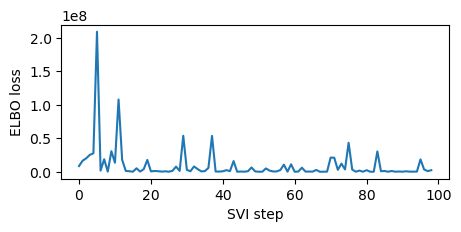

In [ ]:
plt.figure(figsize=(5, 2))
plt.plot(losses[0:99])
plt.xlabel("SVI step")
#plt.ylim([0,100])
plt.ylabel("ELBO loss");

IndexError: list index out of range

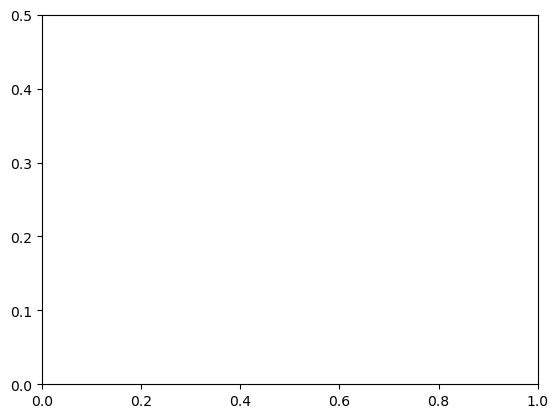

In [ ]:
import matplotlib.pyplot as plt
for i in range(100000):
    if i%1000==0:
        plt.ylim(0.0,0.5)   
        plt.bar(np.array(range(99)),probs[i])
        plt.savefig("result01/"+str(i).zfill(6))
        plt.clf()

In [ ]:
!convert -delay 1 -loop 0 result01/*.png result01/prob_tau.gif